In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats
import math

mpl.rc('font', family='Malgun Gothic')

In [2]:
df1 = pd.read_csv('Product_data.csv')
df2 = pd.read_csv('Member_data02.csv')
df3 = pd.read_csv('Sales_data02.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## 데이터 결측치 및 이상치 정리
### 결측치 확인

In [3]:
df1

,물품대분류,상품명,물품판매량,제품단가
0,FC,(1+1) 좋은느낌 입는 오버나이트 대형 8개입,15,0
1,FC,(1+1) 좋은느낌 입는 오버나이트 중형 8개입,10,0
2,FC,(1+1) 화이트 입는 오버나이트 대형 L 8개입 (EA),27,0
3,FC,(1+1) 화이트 입는 오버나이트 중형 M 8개입 (EA),12,0
4,FC,(핫딜위크/1+1) 좋은느낌 입는 오버나이트 대형 8개입,4,0
...,...,...,...,...
3043,팬티,하기스 에어솔솔 썸머팬티 6단계 여아용 68매(팬티형),4,47360
3044,팬티,하기스 에어솔솔 팬티 4단계 남아용 96매(팬티형),18,71040
3045,팬티,하기스 에어솔솔 팬티 4단계 여아용 96매(팬티형),17,66861
3046,팬티,하기스 에어솔솔 팬티 5단계 남아용 80매(팬티형),81,68994


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3048 entries, 0 to 3047
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   물품대분류   3048 non-null   object
 1   상품명     3048 non-null   object
 2   물품판매량   3048 non-null   int64 
 3   제품단가    3048 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 95.4+ KB


In [5]:
df2
# 데이터 행 전체가 NaN 값을 갖는 행이 보임

,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부
0,2.018123e+14,여,기혼,인천,37.0,국민은행,인스타그램,Yes
1,2.018123e+14,여,기혼,제주,33.0,국민은행,검색광고,Yes
2,2.018123e+14,여,기혼,부산,32.0,하나은행,네이버블로그,Yes
3,2.018123e+14,여,미혼,경남,34.0,기업은행,지인추천,No
4,2.018123e+14,여,기혼,서울,32.0,신한은행,직접검색,Yes
...,...,...,...,...,...,...,...,...
81355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df2.dropna(how='all', inplace = True)
# 위에서 보여진 전체가 결측치인 행 삭제

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81094 entries, 0 to 81093
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      81094 non-null  float64
 1   성별      81094 non-null  object 
 2   결혼유무    81094 non-null  object 
 3   거주지역    81094 non-null  object 
 4   연령      81094 non-null  float64
 5   결제등록카드  81094 non-null  object 
 6   유입경로    81094 non-null  object 
 7   자녀여부    81094 non-null  object 
dtypes: float64(2), object(6)
memory usage: 5.6+ MB


In [8]:
df3

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입)
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형)
2,201902282095385,2019-02-28,2019-03-01,2019-03-05,NaN,201812310749770,5610,3800,FMC,크리넥스？키즈용？화장지？3겹？27m 8롤
3,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형)
4,201905092356247,2019-05-10,2019-05-11,2019-05-13,5.0,201812310749774,50640,39788,기저귀,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형)
...,...,...,...,...,...,...,...,...,...,...
199994,20200724113704-52679491210,2020-07-24,2020-07-25,2020-07-27,5.0,20200724113017315991,11700,9240,FMC,크리넥스 뽑아쓰는 키친타월 펭수에디션 140매 X 4입 (EA)
199995,20200729134816-18220910068,2020-07-29,2020-07-30,2020-08-01,NaN,20200729134409126553,3000,3000,체험팩,맘큐 허그박스
199996,20200803080150-09054399128,2020-08-03,2020-08-04,2020-08-07,5.0,20200803075905757887,5900,5841,체험팩,NEW 하기스 맥스드라이 팬티 3단계 공용 20매(팬티형/체험팩) (EA)
199997,20200805171023-18783441109,2020-08-06,2020-08-07,2020-08-11,NaN,20200805170229147688,3000,3000,체험팩,맘큐 허그박스


In [9]:
df3.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   주문번호       199999 non-null  object 
 1   구매일        199999 non-null  object 
 2   배송시작일      199999 non-null  object 
 3   배송완료일      199999 non-null  object 
 4   구매시월령(수정)  168142 non-null  float64
 5   고객번호       199999 non-null  object 
 6   구매금액       199999 non-null  int64  
 7   결제금액       199999 non-null  int64  
 8   물품대분류      199999 non-null  object 
 9   상품명        199999 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 15.3+ MB


In [10]:
cond1 = ((df1['물품판매량'] < 0) |  (df1['제품단가'] < 0))
df1.loc[cond1]
# df1에서 물품판매량과 제품단가에 대해 마이너스 값을 갖는 이상치 X

,물품대분류,상품명,물품판매량,제품단가


In [11]:
cond1 = (df2['연령'] < 0)
df2.loc[cond1]
# df2에서 연령에 대해 마이너스 값을 갖는 이상치 X

,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부


In [12]:
cond1 = ((df3['구매금액'] < 0) | (df3['결제금액'] < 0))
df3.loc[cond1]
# df3 결제금액에서 마이너스 값을 갖는 이상치 발견
# 구매금액과의 대조를 해본 결과 -부호가 잘못 입력된 것으로 판단
# - 값에 대한 이상치 +로 변경할 필요성

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명
87632,20200630134701-72037838607,2020-06-30,2020-07-01,2020-07-03,12.0,201904040860910,43900,-35166,팬티,2020 하기스 매직팬티 컴포트 썸머 4단계 공용 96매(팬티형)


In [13]:
cond1 = (df3['구매시월령(수정)'] < 0)
df3.loc[cond1]
# df3 구매시월령(수정)에 대해 - 값을 갖는 이상치 다수 발견

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명
71,201902252075542,2019-02-25,2019-02-26,2019-03-02,-10.0,201812310749831,19100,13454,FMC,크리넥스 데코앤소프트 클래식 27-30롤
72,201905082351322,2019-05-08,2019-05-09,2019-05-11,-8.0,201812310749831,12900,9692,더블하트,더블하트 SofTouch 모유실감 젖꼭지 LL (2입)
73,201907132587291,2019-07-13,2019-07-14,2019-07-16,-5.0,201812310749831,33400,24066,FMC,크리넥스 순수 3겹 소프트 27m-30롤 X 2
95,201812311862337,2019-01-01,2019-01-02,2019-01-04,-1.0,201812310749862,13000,9260,더블하트,더블하트 젖꼭지 브러쉬 와이드형+젖병 스펀지 브러쉬 일반형
136,201901151902614,2019-01-15,2019-01-16,2019-01-19,-2.0,201812310749902,3600,2445,FMC,크리넥스 안심 클래식 키친타올 120매 X 4롤
...,...,...,...,...,...,...,...,...,...,...
199891,201912313250833,2019-12-31,2020-01-01,2020-01-03,-1.0,201912311058878,3000,3000,체험팩,맘큐 허그박스
199892,201912313251757,2020-01-01,2020-01-02,2020-01-05,-8.0,201912311058879,3000,3000,체험팩,맘큐 허그박스
199896,201912313250874,2019-12-31,2020-01-01,2020-01-03,-1.0,201912311058884,3000,3000,체험팩,맘큐 허그박스
199928,201912313251491,2019-12-31,2020-01-01,2020-01-05,-4.0,201912311058993,3000,3000,체험팩,맘큐 허그박스


<AxesSubplot:>

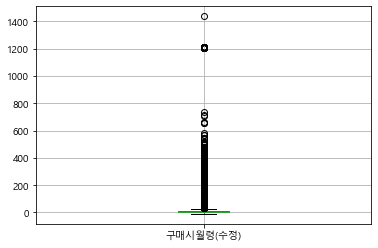

In [14]:
df3.boxplot(column='구매시월령(수정)')
# 위와 반대로 월령이 너무 큰 이상치에 대한 해결이 필요함
# ex) 1400(약 116살)

### 이상치 제거 | 대체
1. 결제 금액에서 음수 값을 양수값으로 대체

In [15]:
df3['결제금액'].replace({-35166:35166}, inplace=True)
cond1 = (df3['결제금액'] < 0)
df3.loc[cond1]

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명


1. 이상치들은 삭제 후 상품명에 따라 월령을 설정할 예정
    - 상품명에 따른 월령의 대푯값이 필요
2. 구매한 상품명이 유아용품이 아닌 브랜드(좋은느낌, 화이트, 라네이처)인 것은 월령을 None으로 설정
    - 데이터 정제에 브랜드가 활용되어 상품명을 통한 브랜드 지정 과정이 필요

In [16]:
Q1 = df3['구매시월령(수정)'].quantile(q=0.25)
Q3 = df3['구매시월령(수정)'].quantile(q=0.75)
IQR = Q3 - Q1

def moon_age(df):
    if df > (Q3 + 1.5 * IQR):
        return None
    elif df < 0:
        return None
    else:
        return df

df3['구매시월령(수정)'] = df3['구매시월령(수정)'].apply(moon_age)

In [17]:
df3['구매시월령(수정)'].isnull().sum()

66931

In [18]:
p1 = df3.pivot_table(index='상품명', values='구매시월령(수정)', aggfunc='median')
p1['구매시월령(수정)'] = p1['구매시월령(수정)'].round()
p1

,구매시월령(수정)
상품명,
(1+1) 좋은느낌 입는 오버나이트 대형 8개입,14.0
(1+1) 좋은느낌 입는 오버나이트 중형 8개입,14.0
(1+1) 크리넥스 버블버블 핸드워시 그린향 거품펌프형 250ml + 용기형리필 250ml X 2,13.0
(1+1) 크리넥스 버블버블 핸드워시 상큼향 거품펌프형 250ml + 용기형리필 250ml X 2,13.0
(1+1) 화이트 입는 오버나이트 대형 L 8개입 (EA),6.0
...,...
화이트 탐폰 오가닉 레귤러 14개입,27.0
화이트 탐폰 오가닉 슈퍼 14개입,21.0
화이트 한듯안한듯 팬티라이너 롱 36개입,7.0


In [19]:
df4 = pd.merge(df3, p1, how='inner', on='상품명')
df4

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정)_x,고객번호,구매금액,결제금액,물품대분류,상품명,구매시월령(수정)_y
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),2.0
1,201812311862368,2019-01-01,2019-01-02,2019-01-04,1.0,201812310749857,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),2.0
2,201904142278370,2019-04-14,2019-04-15,2019-04-18,2.0,201812310749864,25800,17344,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),2.0
3,201905202392233,2019-05-21,2019-05-22,2019-05-25,NaN,201812310749934,12900,9692,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),2.0
4,201907172607939,2019-07-17,2019-07-18,2019-07-20,3.0,201812310749956,12900,9692,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),2.0
...,...,...,...,...,...,...,...,...,...,...,...
199413,202002253450563,2020-02-26,2020-02-27,2020-02-29,2.0,201912271057299,39600,39600,기타,[실리만] 실리콘 어린이 식탁매트(동물) WSB264-레몬,2.0
199414,202003043487737,2020-03-05,2020-03-06,2020-03-08,2.0,201912271057299,39600,39600,기타,[실리만] 실리콘 어린이 식탁매트(동물) WSB264-하늘,2.0
199415,202003043487737,2020-03-05,2020-03-06,2020-03-08,2.0,201912271057299,19800,19800,기타,[실리만] 실리콘 어린이 식판 WSB262 하늘,2.0
199416,202003063494576,2020-03-06,2020-03-07,2020-03-09,2.0,201912271057299,19800,19800,기타,[실리만] 실리콘 어린이 식판 WSB262 하늘,2.0


In [20]:
def concat_moon(df):
    if math.isnan(df[0]):
        return df[1]
    else:
        return df[0]

df4['구매시월령(수정)'] = df4[['구매시월령(수정)_x', 
                        '구매시월령(수정)_y']].apply(concat_moon, axis=1)

In [21]:
df4.drop(['구매시월령(수정)_x', '구매시월령(수정)_y'], axis=1, inplace=True)

In [22]:
df4

,주문번호,구매일,배송시작일,배송완료일,고객번호,구매금액,결제금액,물품대분류,상품명,구매시월령(수정)
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,201812310749735,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),4.0
1,201812311862368,2019-01-01,2019-01-02,2019-01-04,201812310749857,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1.0
2,201904142278370,2019-04-14,2019-04-15,2019-04-18,201812310749864,25800,17344,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),2.0
3,201905202392233,2019-05-21,2019-05-22,2019-05-25,201812310749934,12900,9692,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),2.0
4,201907172607939,2019-07-17,2019-07-18,2019-07-20,201812310749956,12900,9692,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),3.0
...,...,...,...,...,...,...,...,...,...,...
199413,202002253450563,2020-02-26,2020-02-27,2020-02-29,201912271057299,39600,39600,기타,[실리만] 실리콘 어린이 식탁매트(동물) WSB264-레몬,2.0
199414,202003043487737,2020-03-05,2020-03-06,2020-03-08,201912271057299,39600,39600,기타,[실리만] 실리콘 어린이 식탁매트(동물) WSB264-하늘,2.0
199415,202003043487737,2020-03-05,2020-03-06,2020-03-08,201912271057299,19800,19800,기타,[실리만] 실리콘 어린이 식판 WSB262 하늘,2.0
199416,202003063494576,2020-03-06,2020-03-07,2020-03-09,201912271057299,19800,19800,기타,[실리만] 실리콘 어린이 식판 WSB262 하늘,2.0


In [23]:
df4['구매시월령(수정)'].isnull().sum()

0

### 상품별 브랜드 지정 - df1 사용

- 브랜드를 추가하면서 기타에 들어가있는 품목을 확인
- 품목 앞에 브랜드를 확인하여 brand_list에 추가하는 방식을 통하여 브랜드 분류

In [24]:
brand_list = ['하기스', '그린핑거', '굿나이트', '좋은느낌', '화이트', '라네이처',
              '크리넥스', '스카트', '디펜드', '유한양행', '티엔', '맘큐', '닥터마밍', 
              '드시모네', '릴리유', '핑크퐁', '메이브리즈', '더블하트', '레드투래드', 
              '꿈비', '먼치킨', '리틀누', '룰라러브', '브라이트스타트', '맘마밀', 
              '매일우유', '메릴린', '뿌띠슈', '몽슈레', '순수담다', '무무브', '에불로보',
              '스와들디자인', '베이비머핀', '시크릿쥬쥬', '베이비아인슈타인', '바디빔', 
              '바오밥성장그림', '신비아파트', '보니타베베', '보보앤부', '실리만', '보쉬토이', 
              '본토이', '브리카', '아이엠스페셜', '아이스크림페어리', '비박스', '비더마틱', 
              '비츠', '뽀드미엘', '쁘띠베베', '산골간식', '엘트라', '오볼', '상하목장', 
              '상하치즈', '율그란', '스와들업', '크로텍', '키썸플레이', '씨알로', '테스', 
              '야마토야', '에르고베이비', '필리앤임프스', '엘비니', '캐스돈', '엔픽스', 
              '요미요미', '올라베이비', '탑브라이트', '킨더초콜릿', '콱스', '캐시크루즈', 
              '카가앤푸치', '젤리맘', '윈펀', '레고', '리틀마마', '릴라스틸', '마더니아', 
              '마이포코리아', '맘스앱솔루트', '매직캔','메가블럭', '믹스드페어스', 
              '아이헤이트먼데이', '에르고파우치', '립톤', '바세린', '도담도담오가닉', 
              '디어에코', '디즈니베이비', '라그랑', '누들앤부', '너프', '누텔라', '뉴나', 
              '뉴오리진', '데르뜨', '라밀로우', '라인프렌즈', '트루자임', '페레로로쉐',
              '퓨리티', '플레이도', '피에스타', '해밀턴', 'Go-MINI', '도브', '트레제메', '조이']

def brand(df):
    for brand_name in brand_list:
        if (brand_name in df):
            a = brand_name
            break
        else:
            a = '기타'
    return a
            
        
df1['브랜드'] = df1['상품명'].apply(brand)

In [25]:
cond1 = (df1['브랜드'] == '기타')
df1.loc[cond1]

,물품대분류,상품명,물품판매량,제품단가,브랜드
8,FC,[대량발주] 택배파손_1224,1,35500,기타
279,FMC,[대량발주] 택배파손_0102,1,30800,기타
754,기저귀,스마트 프리미엄 멤버십 가입선물,80,129000,기타
872,기타,(증정) 쥬트 린넨 쇼퍼백,13,0,기타
2071,기타,스페셜기프트SET♥MD추천♥(M2),1,34900,기타
2072,기타,스페셜기프트SET♥디즈니미니♥(S3),1,21900,기타
2073,기타,스페셜기프트SET♥디즈니미키♥(S2),6,26417,기타
2074,기타,스페셜기프트SET♥디즈니푸우♥(S4),3,40300,기타
2075,기타,스페셜기프트SET♥범블비와미니♥(M5),6,34900,기타
2076,기타,스페셜기프트SET♥범블비와미키♥(M4),1,69800,기타


In [26]:
df1['브랜드'].value_counts()

하기스     714
더블하트    362
실리만     250
그린핑거    175
크리넥스    175
       ... 
쁘띠베베      1
뽀드미엘      1
엔픽스       1
립톤        1
뉴나        1
Name: 브랜드, Length: 114, dtype: int64

In [27]:
df5 = pd.merge(df4, df1, how='inner', on=['상품명', '물품대분류'])
df5

,주문번호,구매일,배송시작일,배송완료일,고객번호,구매금액,결제금액,물품대분류,상품명,구매시월령(수정),물품판매량,제품단가,브랜드
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,201812310749735,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),4.0,2767,20583,더블하트
1,201812311862368,2019-01-01,2019-01-02,2019-01-04,201812310749857,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1.0,2767,20583,더블하트
2,201904142278370,2019-04-14,2019-04-15,2019-04-18,201812310749864,25800,17344,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),2.0,2767,20583,더블하트
3,201905202392233,2019-05-21,2019-05-22,2019-05-25,201812310749934,12900,9692,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),2.0,2767,20583,더블하트
4,201907172607939,2019-07-17,2019-07-18,2019-07-20,201812310749956,12900,9692,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),3.0,2767,20583,더블하트
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199413,202002253450563,2020-02-26,2020-02-27,2020-02-29,201912271057299,39600,39600,기타,[실리만] 실리콘 어린이 식탁매트(동물) WSB264-레몬,2.0,1,39600,실리만
199414,202003043487737,2020-03-05,2020-03-06,2020-03-08,201912271057299,39600,39600,기타,[실리만] 실리콘 어린이 식탁매트(동물) WSB264-하늘,2.0,1,39600,실리만
199415,202003043487737,2020-03-05,2020-03-06,2020-03-08,201912271057299,19800,19800,기타,[실리만] 실리콘 어린이 식판 WSB262 하늘,2.0,2,19800,실리만
199416,202003063494576,2020-03-06,2020-03-07,2020-03-09,201912271057299,19800,19800,기타,[실리만] 실리콘 어린이 식판 WSB262 하늘,2.0,2,19800,실리만


### 유아용품이 아닌 상품을 구매한 사람의 월령 삭제
- 유아용품 외에 여성용품에 대한 구매시월령은 삭제

In [28]:
def non_baby(df):
    if df[0] in '좋은느낌 화이트 라네이처':
        return None
    else:
        return df[1]
    
df5['구매시월령(수정)'] = df5[['브랜드', '구매시월령(수정)']].apply(non_baby, axis=1)

In [29]:
df5.isnull().sum()

주문번호             0
구매일              0
배송시작일            0
배송완료일            0
고객번호             0
구매금액             0
결제금액             0
물품대분류            0
상품명              0
구매시월령(수정)    12776
물품판매량            0
제품단가             0
브랜드              0
dtype: int64

이제 월령에서 None 값인건 여성용품  
이외의 결측치와 이상치는 해결

## 데이터 추가

### 재방문횟수

In [30]:
df5['재방문횟수'] = 1
p1 = df5.pivot_table(index='고객번호', values='재방문횟수', 
                     aggfunc='sum').sort_values(by='재방문횟수', ascending=False).reset_index()
p1

,고객번호,재방문횟수
0,201903010820584,60
1,201903010820643,57
2,201902280817642,55
3,201909020975656,55
4,201903010820392,54
...,...,...
81203,201902220808723,1
81204,201902220808722,1
81205,201902220808718,1
81206,201907050933349,1


In [31]:
df5.drop('재방문횟수', axis=1, inplace=True)
df6 = pd.merge(df5, p1, how='inner', on='고객번호')
df6

,주문번호,구매일,배송시작일,배송완료일,고객번호,구매금액,결제금액,물품대분류,상품명,구매시월령(수정),물품판매량,제품단가,브랜드,재방문횟수
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,201812310749735,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),4.0,2767,20583,더블하트,2
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,201812310749735,51200,37769,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),14.0,253,53648,하기스,2
2,201812311862368,2019-01-01,2019-01-02,2019-01-04,201812310749857,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1.0,2767,20583,더블하트,1
3,201904142278370,2019-04-14,2019-04-15,2019-04-18,201812310749864,25800,17344,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),2.0,2767,20583,더블하트,2
4,201904142278370,2019-04-14,2019-04-15,2019-04-18,201812310749864,39200,31046,더블하트,더블하트 SofTouch 모유실감 PPSU 젖병 노꼭지 트윈팩 240ml(애니멀),2.0,235,47040,더블하트,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199413,201912073130308,2019-12-07,2019-12-08,2019-12-10,201912061041315,142080,92700,팬티,하기스 맥스드라이 팬티 5단계 여아 80매(팬티형) X3,23.0,2,142080,하기스,1
199414,201912043124190,2019-12-05,2019-12-06,2019-12-08,201912041040187,10000,10000,기타,[실리만] 실리콘 노리개 젖꼭지(2단계) WSB220 내츄럴,3.0,1,10000,실리만,1
199415,201912083134193,2019-12-09,2019-12-10,2019-12-13,201912081041996,142080,91773,팬티,하기스 맥스드라이 팬티 6단계 남아 68매(팬티형) X3,13.0,1,142080,하기스,1
199416,20200717152313-79907082896,2020-07-18,2020-07-19,2020-07-21,201912261056818,6000,6000,기타,[실리만] 실리콘 프리미엄 젓가락 1SET WSK3723,12.0,1,6000,실리만,1


In [32]:
df_rebuy = pd.merge(p1, df2, how='inner', left_on='고객번호', right_on='ID')
df_rebuy

,고객번호,재방문횟수,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부
0,201903010820584,60,2.019030e+14,여,기혼,경북,29.0,국민은행,네이버블로그,Yes
1,201903010820643,57,2.019030e+14,여,기혼,인천,31.0,BC카드,검색광고,Yes
2,201902280817642,55,2.019023e+14,여,기혼,경남,30.0,롯데카드,네이버블로그,Yes
3,201909020975656,55,2.019090e+14,여,기혼,경기,32.0,롯데카드,인스타그램,Yes
4,201903010820392,54,2.019030e+14,여,기혼,강원,33.0,농협회원조합,페이스북,Yes
...,...,...,...,...,...,...,...,...,...,...
79151,201907050933328,1,2.019071e+14,여,기혼,강원,32.0,롯데카드,네이버블로그,Yes
79152,201902220808723,1,2.019022e+14,여,기혼,인천,35.0,우리은행,지인추천,Yes
79153,201902220808722,1,2.019022e+14,여,기혼,경기,30.0,신한카드,검색광고,Yes
79154,201902220808718,1,2.019022e+14,여,기혼,경기,33.0,현대카드,인스타그램,Yes


<AxesSubplot:xlabel='연령', ylabel='재방문횟수'>

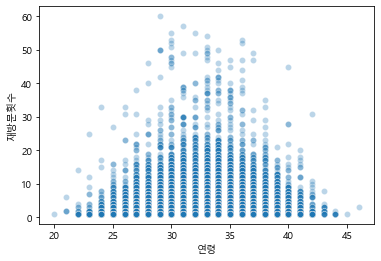

In [33]:
sns.scatterplot(data=df_rebuy, x='연령', y='재방문횟수', alpha=0.3)

In [34]:
df_rebuy.mode(axis=0, numeric_only=False, dropna=True).head(1)

,고객번호,재방문횟수,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부
0,201812310749735,1.0,2.018123e+14,여,기혼,경기,33.0,국민은행,인스타그램,Yes


### 데이터 하나로 다 합쳐버리기

In [35]:
df7 = pd.merge(df6, df2, how='inner', left_on='고객번호', right_on='ID')
df7

,주문번호,구매일,배송시작일,배송완료일,고객번호,구매금액,결제금액,물품대분류,상품명,구매시월령(수정),...,브랜드,재방문횟수,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,201812310749735,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),4.0,...,더블하트,2,2.018123e+14,여,기혼,인천,37.0,국민은행,인스타그램,Yes
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,201812310749735,51200,37769,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),14.0,...,하기스,2,2.018123e+14,여,기혼,인천,37.0,국민은행,인스타그램,Yes
2,201812311862368,2019-01-01,2019-01-02,2019-01-04,201812310749857,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1.0,...,더블하트,1,2.018123e+14,여,기혼,강원,33.0,농협회원조합,인스타그램,Yes
3,201904142278370,2019-04-14,2019-04-15,2019-04-18,201812310749864,25800,17344,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),2.0,...,더블하트,2,2.018123e+14,여,기혼,대전,32.0,농협중앙회,네이버카페,Yes
4,201904142278370,2019-04-14,2019-04-15,2019-04-18,201812310749864,39200,31046,더블하트,더블하트 SofTouch 모유실감 PPSU 젖병 노꼭지 트윈팩 240ml(애니멀),2.0,...,더블하트,2,2.018123e+14,여,기혼,대전,32.0,농협중앙회,네이버카페,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196033,20200528143750-97700833919,2020-05-28,2020-05-29,2020-05-31,201912091042433,33120,27210,더블하트,더블하트 마그마그 스트로컵 올인원 세트 (EA),4.0,...,더블하트,1,2.019121e+14,남,기혼,서울,35.0,부산은행,지인추천,Yes
196034,201912053126592,2019-12-06,2019-12-07,2019-12-09,201911251036164,142080,91773,팬티,하기스 맥스드라이 팬티 5단계 여아 80매(팬티형) X3,24.0,...,하기스,1,2.019113e+14,여,기혼,전남,33.0,농협회원조합,인스타그램,Yes
196035,201912073130308,2019-12-07,2019-12-08,2019-12-10,201912061041315,142080,92700,팬티,하기스 맥스드라이 팬티 5단계 여아 80매(팬티형) X3,23.0,...,하기스,1,2.019121e+14,여,기혼,서울,33.0,롯데카드,인스타그램,Yes
196036,201912043124190,2019-12-05,2019-12-06,2019-12-08,201912041040187,10000,10000,기타,[실리만] 실리콘 노리개 젖꼭지(2단계) WSB220 내츄럴,3.0,...,실리만,1,2.019120e+14,여,미혼,충북,33.0,신한은행,인스타그램,No


### 찐주문일자 (주문번호를 통한 주문일)

In [36]:
def real_buy(df):
    return df[0:8]

df7['찐주문일자'] = df7['주문번호'].apply(real_buy)

In [37]:
df7['배송시작일'] = pd.to_datetime(df7['배송시작일'])
df7['배송완료일'] = pd.to_datetime(df7['배송완료일'])
df7['구매일'] = pd.to_datetime(df7['구매일'])
df7['찐주문일자'] = pd.to_datetime(df7['찐주문일자'])

### 걸린배송일 (배송완료일 - 찐주문일자)

In [38]:
(df7['구매일'] - df7['찐주문일자']).value_counts()
# 진짜로 고객이 주문을 한 날짜와 상품을 접수한 날짜

0 days    99749
1 days    96289
dtype: int64

In [39]:
df7['걸린배송일'] = (df7['배송완료일'] - df7['찐주문일자'])

### 구매일에 따른 년, 월, 일 데이터 추가

In [40]:
df7['찐주문_년'] = df7['찐주문일자'].dt.year
df7['찐주문_월'] = df7['찐주문일자'].dt.month
df7['찐주문_일'] = df7['찐주문일자'].dt.day

### 마지막 구입일로부터 현재까지 얼마나 지났는지
1. 마지막 구입일 구하기

In [41]:
p2 = df7.pivot_table(index='고객번호', values='구매일', aggfunc='max')
p2.rename(columns={'구매일':'마지막구매일'}, inplace=True)

2. 현재를 구하기 - 데이터 상 마지막 날짜

In [42]:
p2['마지막구매일'].max()

Timestamp('2020-08-07 00:00:00')

In [43]:
p2['다시돌아와'] = p2['마지막구매일'].max() - p2['마지막구매일']
p2

,마지막구매일,다시돌아와
고객번호,,
201812310749735,2020-02-20,169 days
201812310749770,2019-02-28,526 days
201812310749771,2019-05-13,452 days
201812310749774,2019-07-29,375 days
201812310749780,2019-01-30,555 days
...,...,...
201912181051567,2019-12-19,232 days
201912181051577,2019-12-19,232 days
201912181051582,2020-05-22,77 days


In [44]:
(p2['다시돌아와'] > '720days').sum()

0

In [45]:
(p2['다시돌아와'] > '630days').sum()

0

In [46]:
(p2['다시돌아와'] > '540days').sum()

2859

In [47]:
(p2['다시돌아와'] > '450days').sum()

14366

In [48]:
(p2['다시돌아와'] > '360days').sum()

27902

In [49]:
((p2['다시돌아와'] > '450days') & (p2['다시돌아와'] < '540days')).sum()

11402

In [50]:
((p2['다시돌아와'] > '360days') & (p2['다시돌아와'] < '450days')).sum()

13443

In [51]:
p2['마지막구매일'].max() - p2['마지막구매일'].min()

Timedelta('584 days 00:00:00')

### 가입일자 (고객번호 앞에 8숫자)

In [52]:
p2.reset_index(inplace=True)

In [53]:
def ing_day(df):
    return str(df)[0:8]

p2['가입일자'] = p2['고객번호'].apply(ing_day)
p2['가입일자'] = pd.to_datetime(p2['가입일자'])
p2

,고객번호,마지막구매일,다시돌아와,가입일자
0,201812310749735,2020-02-20,169 days,2018-12-31
1,201812310749770,2019-02-28,526 days,2018-12-31
2,201812310749771,2019-05-13,452 days,2018-12-31
3,201812310749774,2019-07-29,375 days,2018-12-31
4,201812310749780,2019-01-30,555 days,2018-12-31
...,...,...,...,...
79151,201912181051567,2019-12-19,232 days,2019-12-18
79152,201912181051577,2019-12-19,232 days,2019-12-18
79153,201912181051582,2020-05-22,77 days,2019-12-18
79154,201912181051590,2020-03-02,158 days,2019-12-18


### 회원유지기간 (마지막 구매일 - 가입일자)

In [54]:
p2['회원유지기간'] = p2['마지막구매일'] - p2['가입일자']

In [55]:
p2

,고객번호,마지막구매일,다시돌아와,가입일자,회원유지기간
0,201812310749735,2020-02-20,169 days,2018-12-31,416 days
1,201812310749770,2019-02-28,526 days,2018-12-31,59 days
2,201812310749771,2019-05-13,452 days,2018-12-31,133 days
3,201812310749774,2019-07-29,375 days,2018-12-31,210 days
4,201812310749780,2019-01-30,555 days,2018-12-31,30 days
...,...,...,...,...,...
79151,201912181051567,2019-12-19,232 days,2019-12-18,1 days
79152,201912181051577,2019-12-19,232 days,2019-12-18,1 days
79153,201912181051582,2020-05-22,77 days,2019-12-18,156 days
79154,201912181051590,2020-03-02,158 days,2019-12-18,75 days


In [56]:
df7

,주문번호,구매일,배송시작일,배송완료일,고객번호,구매금액,결제금액,물품대분류,상품명,구매시월령(수정),...,거주지역,연령,결제등록카드,유입경로,자녀여부,찐주문일자,걸린배송일,찐주문_년,찐주문_월,찐주문_일
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,201812310749735,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),4.0,...,인천,37.0,국민은행,인스타그램,Yes,2019-05-05,6 days,2019,5,5
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,201812310749735,51200,37769,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),14.0,...,인천,37.0,국민은행,인스타그램,Yes,2020-02-20,3 days,2020,2,20
2,201812311862368,2019-01-01,2019-01-02,2019-01-04,201812310749857,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1.0,...,강원,33.0,농협회원조합,인스타그램,Yes,2018-12-31,4 days,2018,12,31
3,201904142278370,2019-04-14,2019-04-15,2019-04-18,201812310749864,25800,17344,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),2.0,...,대전,32.0,농협중앙회,네이버카페,Yes,2019-04-14,4 days,2019,4,14
4,201904142278370,2019-04-14,2019-04-15,2019-04-18,201812310749864,39200,31046,더블하트,더블하트 SofTouch 모유실감 PPSU 젖병 노꼭지 트윈팩 240ml(애니멀),2.0,...,대전,32.0,농협중앙회,네이버카페,Yes,2019-04-14,4 days,2019,4,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196033,20200528143750-97700833919,2020-05-28,2020-05-29,2020-05-31,201912091042433,33120,27210,더블하트,더블하트 마그마그 스트로컵 올인원 세트 (EA),4.0,...,서울,35.0,부산은행,지인추천,Yes,2020-05-28,3 days,2020,5,28
196034,201912053126592,2019-12-06,2019-12-07,2019-12-09,201911251036164,142080,91773,팬티,하기스 맥스드라이 팬티 5단계 여아 80매(팬티형) X3,24.0,...,전남,33.0,농협회원조합,인스타그램,Yes,2019-12-05,4 days,2019,12,5
196035,201912073130308,2019-12-07,2019-12-08,2019-12-10,201912061041315,142080,92700,팬티,하기스 맥스드라이 팬티 5단계 여아 80매(팬티형) X3,23.0,...,서울,33.0,롯데카드,인스타그램,Yes,2019-12-07,3 days,2019,12,7
196036,201912043124190,2019-12-05,2019-12-06,2019-12-08,201912041040187,10000,10000,기타,[실리만] 실리콘 노리개 젖꼭지(2단계) WSB220 내츄럴,3.0,...,충북,33.0,신한은행,인스타그램,No,2019-12-04,4 days,2019,12,4


In [57]:
df8 = pd.merge(p2, df7, how='inner', on='고객번호')
df8

,고객번호,마지막구매일,다시돌아와,가입일자,회원유지기간,주문번호,구매일,배송시작일,배송완료일,구매금액,...,거주지역,연령,결제등록카드,유입경로,자녀여부,찐주문일자,걸린배송일,찐주문_년,찐주문_월,찐주문_일
0,201812310749735,2020-02-20,169 days,2018-12-31,416 days,201905052342970,2019-05-06,2019-05-07,2019-05-11,25800,...,인천,37.0,국민은행,인스타그램,Yes,2019-05-05,6 days,2019,5,5
1,201812310749735,2020-02-20,169 days,2018-12-31,416 days,202002203424450,2020-02-20,2020-02-21,2020-02-23,51200,...,인천,37.0,국민은행,인스타그램,Yes,2020-02-20,3 days,2020,2,20
2,201812310749770,2019-02-28,526 days,2018-12-31,59 days,201902282095385,2019-02-28,2019-03-01,2019-03-05,5610,...,제주,33.0,국민은행,검색광고,Yes,2019-02-28,5 days,2019,2,28
3,201812310749771,2019-05-13,452 days,2018-12-31,133 days,201905132367003,2019-05-13,2019-05-14,2019-05-16,59520,...,부산,32.0,하나은행,네이버블로그,Yes,2019-05-13,3 days,2019,5,13
4,201812310749774,2019-07-29,375 days,2018-12-31,210 days,201905092356247,2019-05-10,2019-05-11,2019-05-13,50640,...,경남,34.0,기업은행,지인추천,No,2019-05-09,4 days,2019,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196033,201912181051590,2020-03-02,158 days,2019-12-18,75 days,202001313357631,2020-02-01,2020-02-02,2020-02-05,2200,...,전북,31.0,부산은행,네이버블로그,No,2020-01-31,5 days,2020,1,31
196034,201912181051590,2020-03-02,158 days,2019-12-18,75 days,202002053372744,2020-02-05,2020-02-06,2020-02-09,2090,...,전북,31.0,부산은행,네이버블로그,No,2020-02-05,4 days,2020,2,5
196035,201912181051590,2020-03-02,158 days,2019-12-18,75 days,202002113390379,2020-02-11,2020-02-12,2020-02-14,19900,...,전북,31.0,부산은행,네이버블로그,No,2020-02-11,3 days,2020,2,11
196036,201912181051590,2020-03-02,158 days,2019-12-18,75 days,201912183195376,2019-12-19,2019-12-20,2019-12-22,7400,...,전북,31.0,부산은행,네이버블로그,No,2019-12-18,4 days,2019,12,18


In [58]:
df8['구매횟수'] = 1
p3 = df8.pivot_table(index='고객번호', values='구매횟수', aggfunc='sum').reset_index()
p3.sort_values(by='구매횟수')
p3

,고객번호,구매횟수
0,201812310749735,2
1,201812310749770,1
2,201812310749771,1
3,201812310749774,2
4,201812310749780,1
...,...,...
79151,201912181051567,1
79152,201912181051577,1
79153,201912181051582,1
79154,201912181051590,5


In [59]:
df8.drop('구매횟수', axis=1, inplace=True)
df9 = pd.merge(p3, df8, how='inner', on='고객번호')

In [60]:
df8

,고객번호,마지막구매일,다시돌아와,가입일자,회원유지기간,주문번호,구매일,배송시작일,배송완료일,구매금액,...,거주지역,연령,결제등록카드,유입경로,자녀여부,찐주문일자,걸린배송일,찐주문_년,찐주문_월,찐주문_일
0,201812310749735,2020-02-20,169 days,2018-12-31,416 days,201905052342970,2019-05-06,2019-05-07,2019-05-11,25800,...,인천,37.0,국민은행,인스타그램,Yes,2019-05-05,6 days,2019,5,5
1,201812310749735,2020-02-20,169 days,2018-12-31,416 days,202002203424450,2020-02-20,2020-02-21,2020-02-23,51200,...,인천,37.0,국민은행,인스타그램,Yes,2020-02-20,3 days,2020,2,20
2,201812310749770,2019-02-28,526 days,2018-12-31,59 days,201902282095385,2019-02-28,2019-03-01,2019-03-05,5610,...,제주,33.0,국민은행,검색광고,Yes,2019-02-28,5 days,2019,2,28
3,201812310749771,2019-05-13,452 days,2018-12-31,133 days,201905132367003,2019-05-13,2019-05-14,2019-05-16,59520,...,부산,32.0,하나은행,네이버블로그,Yes,2019-05-13,3 days,2019,5,13
4,201812310749774,2019-07-29,375 days,2018-12-31,210 days,201905092356247,2019-05-10,2019-05-11,2019-05-13,50640,...,경남,34.0,기업은행,지인추천,No,2019-05-09,4 days,2019,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196033,201912181051590,2020-03-02,158 days,2019-12-18,75 days,202001313357631,2020-02-01,2020-02-02,2020-02-05,2200,...,전북,31.0,부산은행,네이버블로그,No,2020-01-31,5 days,2020,1,31
196034,201912181051590,2020-03-02,158 days,2019-12-18,75 days,202002053372744,2020-02-05,2020-02-06,2020-02-09,2090,...,전북,31.0,부산은행,네이버블로그,No,2020-02-05,4 days,2020,2,5
196035,201912181051590,2020-03-02,158 days,2019-12-18,75 days,202002113390379,2020-02-11,2020-02-12,2020-02-14,19900,...,전북,31.0,부산은행,네이버블로그,No,2020-02-11,3 days,2020,2,11
196036,201912181051590,2020-03-02,158 days,2019-12-18,75 days,201912183195376,2019-12-19,2019-12-20,2019-12-22,7400,...,전북,31.0,부산은행,네이버블로그,No,2019-12-18,4 days,2019,12,18


## 데이터 분석
### 월령에 따른 인기 제품 (물품 판매량 기준)

In [61]:
df8['판매량'] = 1
p4 = df8.pivot_table(index = ['구매시월령(수정)', '상품명'], values='판매량', 
                     aggfunc='sum').reset_index()
df8.drop('판매량', axis=1, inplace=True)
p4

,구매시월령(수정),상품명,판매량
0,0.0,(1번세트/증정) 더블하트 레스랩 유아용 섬유세제 50ml (EA),1
1,0.0,2020 하기스 매직 컴포트 1단계 공용 264매,1
2,0.0,2020 하기스 매직 컴포트 1단계 공용 264매(밴드형),61
3,0.0,2020 하기스 매직 컴포트 2단계 공용 246매,2
4,0.0,2020 하기스 매직 컴포트 2단계 공용 246매(밴드형),95
...,...,...,...
18944,29.0,하기스 수딩케어 물티슈 캡형 64매X10팩,1
18945,29.0,하기스 에어솔솔 팬티 4단계 남아용 96매(팬티형),1
18946,29.0,하기스 에어솔솔 팬티 4단계 여아용 20매(팬티형/체험팩),1
18947,29.0,하기스 에어솔솔 팬티 5단계 남아용 80매(팬티형),1


In [62]:
df_best_product = pd.DataFrame({'구매시월령(수정)' : [], '상품명' : [], '판매량' : []})
for i in range(0, 30):
    cond1 = (p4['구매시월령(수정)'] == i)
    p5 = p4.loc[cond1]
    cond2 = (p5['판매량'] == p5['판매량'].max())
    p6 = p5.loc[cond2]
    df_best_product = df_best_product.append(p6, ignore_index = True)

In [63]:
df_best_product

,구매시월령(수정),상품명,판매량
0,0.0,맘큐 허그박스,10516.0
1,1.0,하기스 네이처메이드 2단계 여아 156매(밴드형),1426.0
2,2.0,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1060.0
3,3.0,하기스 맥스드라이 3단계 공용 20매(밴드형/체험팩),754.0
4,4.0,하기스 네이처메이드 3단계 여아 132매(밴드형),789.0
5,5.0,더블하트 SofTouch 모유실감 젖꼭지 L (2입),988.0
6,6.0,크리넥스 순수 3겹 소프트 27m-30롤,806.0
7,7.0,릴리유 무민 리미티드 아기물티슈 캡형 80매X10팩,740.0
8,8.0,크리넥스 여행용티슈 카카오프렌즈 70매 X 3개입,912.0
9,9.0,크리넥스 3겹 데코앤소프트 27m 30롤,478.0


In [114]:
df_best_product['판매량'].sum()

21422.0

### 월령에 따른 인기 브랜드

In [64]:
df8['브랜드선호'] = 1

In [65]:
p7 = df8.pivot_table(index = ['구매시월령(수정)', '브랜드'], values='브랜드선호', 
                     aggfunc='sum').reset_index()
df8.drop('브랜드선호', axis=1, inplace=True)

In [66]:
df_best_brand = pd.DataFrame({'구매시월령(수정)' : [], '상품명' : [], '브랜드선호' : []})
for i in range(0, 30):
    cond1 = (p7['구매시월령(수정)'] == i)
    p8 = p7.loc[cond1]
    cond2 = (p8['브랜드선호'] == p8['브랜드선호'].max())
    p9 = p8.loc[cond2]
    df_best_brand = df_best_brand.append(p9, ignore_index = True)

In [67]:
df_best_brand
# 하기스가 대세네

,구매시월령(수정),상품명,브랜드선호,브랜드
0,0.0,NaN,10516.0,맘큐
1,1.0,NaN,7022.0,하기스
2,2.0,NaN,6096.0,하기스
3,3.0,NaN,6658.0,하기스
4,4.0,NaN,7591.0,하기스
5,5.0,NaN,6286.0,하기스
6,6.0,NaN,5783.0,하기스
7,7.0,NaN,5839.0,하기스
8,8.0,NaN,4939.0,하기스
9,9.0,NaN,4954.0,하기스


### 그렇다면 하기스 제품 중 가장 많이 팔리는 건?

In [68]:
cond1 = (df1['브랜드']=='하기스')
df1.loc[cond1].sort_values(by='물품판매량', ascending=False).head()

,물품대분류,상품명,물품판매량,제품단가,브랜드
768,기저귀,하기스 네이처메이드 2단계 여아 156매(밴드형),3010,64679,하기스
766,기저귀,하기스 네이처메이드 2단계 남아 156매(밴드형),2792,65175,하기스
774,기저귀,하기스 네이처메이드 3단계 여아 132매(밴드형),2591,64072,하기스
771,기저귀,하기스 네이처메이드 3단계 남아 132매(밴드형),2375,63401,하기스
2652,체험팩,하기스 맥스드라이 3단계 공용 20매(밴드형/체험팩),2184,6040,하기스


### 월령에 따른 주문수 체크

In [69]:
df8['구매시월령(수정)'].value_counts()

0.0     26288
7.0     13221
4.0     12965
1.0     12717
3.0     12564
8.0     12036
5.0     11983
6.0     11831
2.0     11701
9.0      9284
10.0     8719
12.0     7043
11.0     6294
14.0     4199
13.0     4143
16.0     3160
15.0     2932
17.0     1783
18.0     1467
19.0     1254
22.0     1198
20.0     1149
21.0      850
23.0      825
24.0      765
25.0      711
26.0      692
27.0      620
28.0      574
29.0      557
Name: 구매시월령(수정), dtype: int64

In [70]:
cond1 = (df_rebuy['결혼유무']=='기혼')
cond2 = (df_rebuy['자녀여부']== 'Yes')
df_rebuy.loc[cond1 & cond2]

,고객번호,재방문횟수,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부
0,201903010820584,60,2.019030e+14,여,기혼,경북,29.0,국민은행,네이버블로그,Yes
1,201903010820643,57,2.019030e+14,여,기혼,인천,31.0,BC카드,검색광고,Yes
2,201902280817642,55,2.019023e+14,여,기혼,경남,30.0,롯데카드,네이버블로그,Yes
3,201909020975656,55,2.019090e+14,여,기혼,경기,32.0,롯데카드,인스타그램,Yes
4,201903010820392,54,2.019030e+14,여,기혼,강원,33.0,농협회원조합,페이스북,Yes
...,...,...,...,...,...,...,...,...,...,...
79151,201907050933328,1,2.019071e+14,여,기혼,강원,32.0,롯데카드,네이버블로그,Yes
79152,201902220808723,1,2.019022e+14,여,기혼,인천,35.0,우리은행,지인추천,Yes
79153,201902220808722,1,2.019022e+14,여,기혼,경기,30.0,신한카드,검색광고,Yes
79154,201902220808718,1,2.019022e+14,여,기혼,경기,33.0,현대카드,인스타그램,Yes


In [71]:
df_rebuy.loc[cond1 & ~cond2]

,고객번호,재방문횟수,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부
25,201903010820694,47,2.019030e+14,여,기혼,인천,30.0,농협회원조합,네이버카페,No
27,201902090791939,47,2.019021e+14,여,기혼,부산,36.0,우리은행,인스타그램,No
29,201903010820736,46,2.019030e+14,여,기혼,경북,30.0,농협회원조합,네이버블로그,No
33,201901220770784,45,2.019012e+14,여,기혼,경기,35.0,농협회원조합,네이버블로그,No
76,201903010820352,37,2.019030e+14,여,기혼,충북,33.0,롯데카드,네이버카페,No
...,...,...,...,...,...,...,...,...,...,...
79017,201907060933697,1,2.019071e+14,여,기혼,충남,30.0,롯데카드,인스타그램,No
79025,201902220808576,1,2.019022e+14,여,기혼,강원,32.0,롯데카드,네이버블로그,No
79032,201902220808558,1,2.019022e+14,여,기혼,서울,36.0,국민은행,인스타그램,No
79058,201907060933787,1,2.019071e+14,여,기혼,인천,33.0,부산은행,네이버블로그,No


In [72]:
df_rebuy.loc[~cond1 & ~cond2]

,고객번호,재방문횟수,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부
8,201903010819119,52,2.019030e+14,남,미혼,강원,30.0,롯데카드,인스타그램,No
15,201902190804532,50,2.019022e+14,여,미혼,전북,34.0,농협중앙회,네이버카페,No
30,201902160800931,46,2.019022e+14,여,미혼,광주,34.0,신한은행,인스타그램,No
35,201902170803009,45,2.019022e+14,여,미혼,경기,40.0,신한카드,인스타그램,No
39,201903010820384,42,2.019030e+14,여,미혼,제주,29.0,국민카드,네이버블로그,No
...,...,...,...,...,...,...,...,...,...,...
79121,201907050933409,1,2.019071e+14,여,미혼,부산,31.0,농협회원조합,인스타그램,No
79125,201907050933416,1,2.019071e+14,여,미혼,경기,34.0,신한은행,인스타그램,No
79128,201902220808668,1,2.019022e+14,여,미혼,서울,39.0,롯데카드,검색광고,No
79133,201907050933365,1,2.019071e+14,여,미혼,충남,30.0,하나은행,네이버카페,No


### 자녀여부 / 유입경로 - 브랜드 - 물품대분류

In [73]:
pd.crosstab(df8['자녀여부'], df8['유입경로'])

유입경로,검색광고,네이버블로그,네이버카페,매장쿠폰,오픈마켓,이마트,인스타그램,지인추천,직접검색,페이스북
자녀여부,,,,,,,,,,
No,3881,10438,2807,215,959,77,14806,3784,475,636
Yes,15610,45106,11051,776,4085,453,60620,15437,2190,2632


In [74]:
pd.crosstab(df8['브랜드'], df8['자녀여부']).sort_values(by='No', ascending=False).head(20)

자녀여부,No,Yes
브랜드,,
하기스,17038,70414
더블하트,7138,29333
크리넥스,4393,18003
맘큐,2240,9454
그린핑거,1849,7604
좋은느낌,1823,7905
릴리유,978,4190
스카트,512,2283
화이트,403,1663


In [75]:
pd.crosstab(df8['상품명'], df8['자녀여부']).sort_values(by='No', ascending=False).head(20)

자녀여부,No,Yes
상품명,,
맘큐 허그박스,2240,9454
하기스 네이처메이드 2단계 남아 156매(밴드형),578,2169
더블하트 SofTouch 모유실감 젖꼭지 L (2입),561,2184
하기스 네이처메이드 2단계 여아 156매(밴드형),560,2402
더블하트 SofTouch 모유실감 젖꼭지 M (2입),532,2174
하기스 네이처메이드 3단계 남아 132매(밴드형),503,1829
하기스 네이처메이드 3단계 여아 132매(밴드형),477,2085
하기스 맥스드라이 3단계 공용 20매(밴드형/체험팩),455,1713
더블하트 SofTouch 모유실감 젖꼭지 S (2입),410,1660


In [76]:
pd.crosstab(df8['물품대분류'], df8['자녀여부']).sort_values(by='No', ascending=False).head(20)

자녀여부,No,Yes
물품대분류,,
더블하트,7188,29534
체험팩,6829,27973
기저귀,6784,28001
팬티,5240,21988
FMC,4971,20555
FC,2272,9859
SKC,1785,7321
물티슈,1565,6782
기타,1441,5937


In [77]:
df8.pivot_table(index='자녀여부', values = '구매금액', aggfunc='mean')

,구매금액
자녀여부,
No,30689.460056
Yes,30586.906052


In [78]:
df8.pivot_table(index='자녀여부', values = '구매금액', aggfunc='sum')

,구매금액
자녀여부,
No,1168593260
Yes,4831507680


In [79]:
df8['걸린배송일'].value_counts()

4 days    90349
3 days    69792
5 days    29133
6 days     6764
Name: 걸린배송일, dtype: int64

<AxesSubplot:xlabel='구매시월령(수정)', ylabel='재방문횟수'>

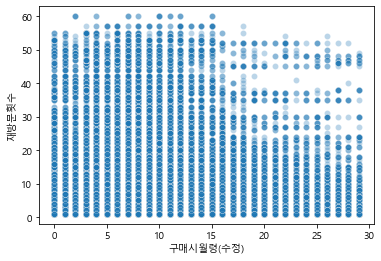

In [80]:
sns.scatterplot(data=df8, x='구매시월령(수정)', y='재방문횟수', alpha=0.3)

In [81]:
# 여성용품에 대한 월령은 None, dropna 사용해서 잠시 제거 
df9 = df8.dropna()

In [82]:
np.corrcoef(df9['구매시월령(수정)'], df9['재방문횟수'])[0, 1]

0.10881256056064165

In [83]:
stats.normaltest(df9['구매시월령(수정)'])

NormaltestResult(statistic=32269.740723575895, pvalue=0.0)

In [84]:
stats.normaltest(df9['재방문횟수'])

NormaltestResult(statistic=119426.17715708946, pvalue=0.0)

In [85]:
stats.spearmanr(df9['구매시월령(수정)'], df9['재방문횟수'])

SpearmanrResult(correlation=0.17586978125992037, pvalue=0.0)

In [86]:
def make_int(df):
    return int(str(df).split()[0])
    
df9['걸린배송일_int'] = df9['걸린배송일'].apply(make_int)

<ipython-input-86-dfeca73e70af>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df9['걸린배송일_int'] = df9['걸린배송일'].apply(make_int)


In [87]:
stats.normaltest(df9['걸린배송일_int'])

NormaltestResult(statistic=11524.779531556163, pvalue=0.0)

In [88]:
stats.normaltest(df9['찐주문_월'])

NormaltestResult(statistic=130791.40333073887, pvalue=0.0)

In [89]:
stats.spearmanr(df9['걸린배송일_int'], df9['찐주문_월'])

SpearmanrResult(correlation=0.008305844112320993, pvalue=0.0003733401055487834)

In [90]:
stats.spearmanr(df9['걸린배송일_int'], df9['재방문횟수'])

SpearmanrResult(correlation=0.0021312492622714667, pvalue=0.36123301080220094)

In [118]:
cond1 = (df8['성별'] == '여')
df_woman = df8[cond1]
stats.normaltest(df_woman['재방문횟수'])

NormaltestResult(statistic=123903.5977091505, pvalue=0.0)

In [119]:
cond2 = (df8['결혼유무'] == '기혼')
stats.ranksums(df_woman[cond2]['재방문횟수'], df_woman[~cond2]['재방문횟수'])

<ipython-input-119-dc3f96fdbea3>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  stats.ranksums(df_woman[cond2]['재방문횟수'], df_woman[~cond2]['재방문횟수'])


RanksumsResult(statistic=2.577934981777887, pvalue=0.009939269758042527)

In [128]:
df_woman.pivot_table(index='결혼유무',values=['구매금액','재방문횟수'],aggfunc=['mean','median'])

mean           median      
              구매금액     재방문횟수   구매금액 재방문횟수
결혼유무                                     
기혼    30587.273242  6.371457  17500     4
미혼    30649.127891  6.047907  17100     4

In [129]:
cond2 = (df8['결혼유무'] == '기혼')
stats.ranksums(df_woman[cond2]['구매금액'], df_woman[~cond2]['구매금액'])

<ipython-input-129-eb413ea7499c>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  stats.ranksums(df_woman[cond2]['구매금액'], df_woman[~cond2]['구매금액'])


RanksumsResult(statistic=0.7147240236206065, pvalue=0.4747795901363373)

<AxesSubplot:xlabel='결혼유무', ylabel='재방문횟수'>

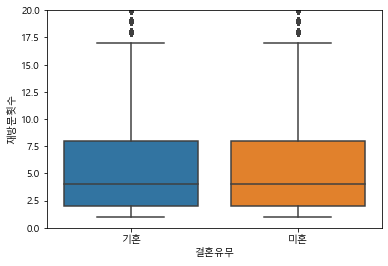

In [124]:
plt.ylim([0,20])
sns.boxplot(data=df_woman, x='결혼유무', y='재방문횟수')

In [125]:
df_woman

,고객번호,마지막구매일,다시돌아와,가입일자,회원유지기간,주문번호,구매일,배송시작일,배송완료일,구매금액,...,거주지역,연령,결제등록카드,유입경로,자녀여부,찐주문일자,걸린배송일,찐주문_년,찐주문_월,찐주문_일
0,201812310749735,2020-02-20,169 days,2018-12-31,416 days,201905052342970,2019-05-06,2019-05-07,2019-05-11,25800,...,인천,37.0,국민은행,인스타그램,Yes,2019-05-05,6 days,2019,5,5
1,201812310749735,2020-02-20,169 days,2018-12-31,416 days,202002203424450,2020-02-20,2020-02-21,2020-02-23,51200,...,인천,37.0,국민은행,인스타그램,Yes,2020-02-20,3 days,2020,2,20
2,201812310749770,2019-02-28,526 days,2018-12-31,59 days,201902282095385,2019-02-28,2019-03-01,2019-03-05,5610,...,제주,33.0,국민은행,검색광고,Yes,2019-02-28,5 days,2019,2,28
3,201812310749771,2019-05-13,452 days,2018-12-31,133 days,201905132367003,2019-05-13,2019-05-14,2019-05-16,59520,...,부산,32.0,하나은행,네이버블로그,Yes,2019-05-13,3 days,2019,5,13
4,201812310749774,2019-07-29,375 days,2018-12-31,210 days,201905092356247,2019-05-10,2019-05-11,2019-05-13,50640,...,경남,34.0,기업은행,지인추천,No,2019-05-09,4 days,2019,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196033,201912181051590,2020-03-02,158 days,2019-12-18,75 days,202001313357631,2020-02-01,2020-02-02,2020-02-05,2200,...,전북,31.0,부산은행,네이버블로그,No,2020-01-31,5 days,2020,1,31
196034,201912181051590,2020-03-02,158 days,2019-12-18,75 days,202002053372744,2020-02-05,2020-02-06,2020-02-09,2090,...,전북,31.0,부산은행,네이버블로그,No,2020-02-05,4 days,2020,2,5
196035,201912181051590,2020-03-02,158 days,2019-12-18,75 days,202002113390379,2020-02-11,2020-02-12,2020-02-14,19900,...,전북,31.0,부산은행,네이버블로그,No,2020-02-11,3 days,2020,2,11
196036,201912181051590,2020-03-02,158 days,2019-12-18,75 days,201912183195376,2019-12-19,2019-12-20,2019-12-22,7400,...,전북,31.0,부산은행,네이버블로그,No,2019-12-18,4 days,2019,12,18


{'whiskers': [<matplotlib.lines.Line2D at 0x1154abafd00>,
 'caps': [<matplotlib.lines.Line2D at 0x1153a1b8400>,
 'boxes': [<matplotlib.lines.Line2D at 0x1154abaf370>,
 'medians': [<matplotlib.lines.Line2D at 0x1153a1b8ac0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1153a1b8e20>,
 'means': []}

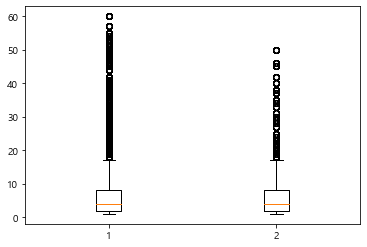

In [93]:
plt.boxplot([df8[cond1&cond2]['재방문횟수'].tolist(), df8[cond1&~cond2]['재방문횟수'].tolist()])

In [94]:
Q1 = df8[cond1&cond2]['재방문횟수'].quantile(q=0.25)
Q1

2.0

In [95]:
Q2 = df8[cond1&cond2]['재방문횟수'].quantile(q=0.5)
Q2

4.0

In [96]:
Q3 = df8[cond1&cond2]['재방문횟수'].quantile(q=0.75)
Q3

8.0

In [97]:
IQR = Q3 - Q1
IQR

6.0

In [98]:
Q1 = df8[cond1&~cond2]['재방문횟수'].quantile(q=0.25)
Q1

2.0

In [99]:
Q2 = df8[cond1&~cond2]['재방문횟수'].quantile(q=0.5)
Q2

4.0

In [100]:
Q3 = df8[cond1&~cond2]['재방문횟수'].quantile(q=0.75)
Q3

8.0

In [101]:
IQR = Q3 - Q1
IQR

6.0

{'whiskers': [<matplotlib.lines.Line2D at 0x115418be4f0>,
 'caps': [<matplotlib.lines.Line2D at 0x115418bebb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x115418be190>,
 'medians': [<matplotlib.lines.Line2D at 0x115418c82b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x115418c8610>,
 'means': []}

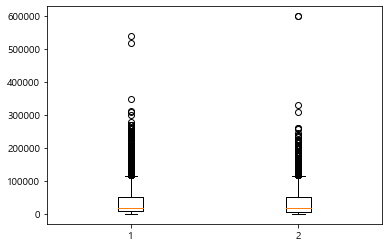

In [102]:
plt.boxplot([df8[cond1&cond2]['구매금액'].tolist(), df8[cond1&~cond2]['구매금액'].tolist()])

In [103]:
Q1 = df8[cond1&cond2]['구매금액'].quantile(q=0.25)
Q1

7400.0

In [104]:
Q1 = df8[cond1&~cond2]['구매금액'].quantile(q=0.25)
Q1

7280.0

In [105]:
Q3 = df8[cond1&cond2]['구매금액'].quantile(q=0.75)
Q3

51200.0

In [106]:
Q3 = df8[cond1&cond2]['구매금액'].quantile(q=0.75)
Q3

51200.0

In [107]:
df_marry = pd.DataFrame(df8[cond1&cond2]['재방문횟수'])
df_marry['결혼유무'] = '기혼'
df_marry.set_index('결혼유무').to_excel('기혼.xlsx')

In [108]:
df_none_marry = pd.DataFrame(df8[cond1&~cond2]['재방문횟수'])
df_none_marry['결혼유무'] = '미혼'
df_none_marry.set_index('결혼유무').to_excel('미혼.xlsx')

In [109]:
df8.pivot_table(index='결혼유무', values='재방문횟수', aggfunc='mean')

,재방문횟수
결혼유무,
기혼,6.364116
미혼,6.102003


In [110]:
stats.normaltest(df8['연령'])

NormaltestResult(statistic=1.8629672124130356, pvalue=0.3939687820470254)

In [111]:
cond1 = (df8['연령'] < 30)
cond2 = (df8['연령'] < 40)

df_2040 = df8.loc[cond1 | ~cond2]
df_30 = df8.loc[~cond1 | cond2]

In [112]:
#맘큐허그박스를 산 사람중 지속일의 비율
cond1 = (df8['상품명'] == '맘큐 허그박스')
df10 = pd.DataFrame(df8.loc[cond1]['회원유지기간'].value_counts()).reset_index()
df10.rename(columns={'회원유지기간':'명수', 'index':'회원유지기간'}, inplace=True)
df10

,회원유지기간,명수
0,1 days,3703
1,0 days,2848
2,2 days,145
3,3 days,116
4,4 days,83
...,...,...
512,410 days,1
513,442 days,1
514,499 days,1
515,468 days,1


In [113]:
df8.to_excel('total_data.xlsx')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\formats\excel.py", line 821, in write
    writer.write_cells(
  File "C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\excel\_xlsxwriter.py", line 240, in write_cells
    wks.write(startrow + cell.row, startcol + cell.col, val, style)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py", line 69, in cell_wrapper
    return method(self, *args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py", line 422, in write
    return self._write(row, col, *args)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py", line 493, in _write
    return self._write_datetime(row, col, *args)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py", line 790, in _write_datetime
    number = self._convert_date_time(date)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py", line 3984, in 

TypeError: object of type 'NoneType' has no len()

In [ ]:
df8.info()

In [ ]:
cond1 = (df8['회원유지기간'] > '4 days')
df8.loc[cond1]['상품명'].value_counts()

In [ ]:
df8.loc[~cond1]['상품명'].value_counts()

In [ ]:
cond1 = (df8['회원유지기간']=='0days')
df8.loc[cond1]['상품명'].value_counts()

In [ ]:
cond1 = (df8['회원유지기간']=='1days')
df8.loc[cond1]['상품명'].value_counts()

In [ ]:
cond1 = (df8['회원유지기간']=='2days')
df8.loc[cond1]['상품명'].value_counts()

In [ ]:
df_rebuy

In [ ]:
p2

In [ ]:
df_customer = pd.merge(df_rebuy, p2)
df_customer

In [ ]:
stats.normaltest(df_customer['재방문횟수'])

In [ ]:
def make_int(df):
    return int(str(df).split()[0])
    
df_customer['회원유지기간_int'] = df_customer['회원유지기간'].apply(make_int)

stats.normaltest(df_customer['회원유지기간_int'])

In [ ]:
stats.spearmanr(df_customer['회원유지기간_int'], df_customer['재방문횟수'])

In [ ]:
np.corrcoef(df_customer['회원유지기간_int'], df_customer['재방문횟수'])[0,1]

In [ ]:
sns.scatterplot(data=df_customer, x='회원유지기간_int', y='재방문횟수')

In [ ]:
# 주문횟수가 1회인 사람들의 회원유지기간
cond1 = (df_customer['재방문횟수'] == 1)
df_customer.loc[cond1]['회원유지기간'].value_counts() / df_customer.loc[cond1]['회원유지기간'].value_counts().sum()

In [ ]:
# 주문횟수가 1회인 사람들의 월령
cond1 = (df8['재방문횟수'] == 1)
df8.loc[cond1]['구매시월령(수정)'].value_counts() / df8['구매시월령(수정)'].value_counts()

In [ ]:
# 주문횟수가 2회이상인 사람들의 월령 비교

In [ ]:
cond1 = (df_customer['재방문횟수'] == 1)
df_customer.loc[~cond1]['회원유지기간'].value_counts() / df_customer.loc[~cond1]['회원유지기간'].value_counts().sum()

In [ ]:
cond1 = (df8['재방문횟수'] == 1)
df8.loc[~cond1]['구매시월령(수정)'].value_counts() / df8['구매시월령(수정)'].value_counts()

In [ ]:
cond1 = (df8['상품명']=='맘큐 허그박스')
df8.loc[cond1]['재방문횟수'].value_counts()

In [ ]:
df8.loc[cond1]

In [ ]:
df8

In [ ]:
df8.loc[cond1]['재방문횟수'].value_counts().sum()

In [ ]:
df8.loc[cond1]['회원유지기간'].value_counts()

In [ ]:
# 맘큐허그박스 구매에 따른  유입경로?
pd.crosstab(df8['상품명'], df8['유입경로']).sort_values(by='인스타그램', ascending=False)

In [ ]:
pd.crosstab(df8['상품명'], df8['유입경로']).loc['맘큐 허그박스']

In [ ]:
cond1 = (df8['유입경로']=='인스타그램')
df8.loc[cond1]

In [ ]:
cond1 = (df8['상품명']=='맘큐 허그박스')
df11 = pd.DataFrame(df8.loc[cond1]['구매일'].value_counts()).reset_index()
df11

In [ ]:
df11.rename(columns={'구매일':'주문수량', 'index':'구매일'}, inplace=True)

In [ ]:
df11.sort_values(by='구매일', inplace=True)

In [ ]:
df12 = pd.DataFrame(df8['구매일'].value_counts()).reset_index()
df12.rename(columns={'구매일':'전체주문수량', 'index':'구매일'}, inplace=True)
df12

In [ ]:
df12.sort_values(by='구매일', inplace=True)
df12

In [ ]:
df13 = pd.merge(df11, df12, how='inner', on='구매일')
df13['허그박스비율'] = df13['주문수량'] / df13['전체주문수량']
df13

In [ ]:
sns.lineplot(x='구매일', y='주문수량', data=df13)

In [ ]:
cond1 = (df8['재방문횟수']==1)
df8.loc[cond1]['걸린배송일'].value_counts()

In [ ]:
stats.normaltest(df8['재방문횟수'])

In [ ]:
np.corrcoef(df9['재방문횟수'], df9['걸린배송일_int'])[0,1]

In [ ]:
stats.spearmanr(df9['재방문횟수'], df9['걸린배송일_int'])

In [ ]:
cond1 = (df8['상품명']=='맘큐 허그박스')
df8.loc[cond1]['물품대분류'].value_counts()

In [ ]:
df8.pivot_table(index='찐주문_월')

In [ ]:
pd.crosstab(df8['결혼유무'], df8['물품대분류']).sum(axis=1)

In [ ]:
df20 = pd.crosstab(df8['결혼유무'], df8['물품대분류'])
df20

In [ ]:
stats.normaltest(df8['구매금액'])

In [ ]:
cond1 = (df8['자녀여부'] == 'Yes')
stats.ranksums(df8.loc[cond1]['구매금액'], df8.loc[~cond1]['구매금액'])

In [ ]:
cond1 = (df8['물품대분류'] == 'SKC')
df8.loc[cond1]['상품명']

In [ ]:
df20.loc['기혼'] / 165980

In [ ]:
df20.loc['미혼'] / 30058

In [ ]:
cond1 = (df8['결혼유무'] == '기혼')
df8.loc[cond1]